In [1]:
import cv2
import matplotlib.pyplot as plt
import pytesseract
import numpy as np
import keras
import numpy as np
from imutils import contours
from PIL import Image, ImageDraw, ImageFilter
import imutils
%matplotlib notebook
np.set_printoptions(threshold=np.inf)

Using TensorFlow backend.


In [2]:
model = keras.models.load_model("digit_classifier.h5")

In [147]:
def predict(x,y,w,h,image):  
    cropped_image = image[y:y+h, x:x+w]
    offset = (5,5)
    #z = img[y:y+h, x:x+w]
    if not (h >= 40 and w <= 8):
        cropped_image = cv2.resize(cropped_image,(20,20))
        offset = ((28 - test.shape[0]) // 2, (28 - test.shape[1]) // 2)
        
    cropped_image = cv2.cvtColor(cropped_image,cv2.COLOR_BGR2GRAY)
    ret, threshed_image = cv2.threshold(cropped_image, 200, 255, cv2.THRESH_BINARY_INV)
    cropped_image = threshed_image.astype("float32") / 255.0
    
    background = Image.fromarray(np.zeros((28,28)).astype(np.uint8))
    image = Image.fromarray(cropped_image)
    background.paste(image,(5,5))
    background = np.array(background)
    background = np.reshape(background, (1,28,28,1))
    
    return np.argmax(model.predict(background))

In [190]:
img = cv2.imread('z.jpg')

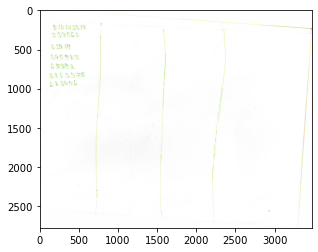

In [184]:
blurred = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#blurred = cv2.medianBlur(blurred,7)

# threshold image
ret, threshed_img = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY_INV)
# find contours and get the external one

edged = imutils.auto_canny(threshed_img)

ctrs, hier = cv2.findContours(threshed_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#image, contours, hier = cv2.findContours(threshed_img, cv2.RETR_TREE,
#                cv2.CHAIN_APPROX_SIMPLE)

# with each contour, draw boundingRect in green
# a minAreaRect in red and
# a minEnclosingCircle in blue
rects = []
long_rects = []
i = 0
#model = keras.models.load_model("digits_classifier.h5")
for c in ctrs:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)
    if w >= 5 and w <= 250 and h >= 6 and h <= 150:
        # Getting rid of nasty noise
        if h <= 11 and w >=65:
            continue
        long_rects.append([x,y,w,h])
for long_rect in long_rects:
    # predict(long_rect[0],long_rect[1],long_rect[2],long_rect[3], img)
    # draw a green rectangle to visualize the bounding rect
    cv2.putText(img, str("{}".format(predict(long_rect[0],long_rect[1],long_rect[2],long_rect[3], img))), (long_rect[0],long_rect[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0),1)
    cv2.rectangle(img, (long_rect[0], long_rect[1]), (long_rect[0]+long_rect[2], long_rect[1]+long_rect[3]), (0, 255, 0), 1)
    i += 1

cv2.drawContours(img, ctrs, -1, (255, 255, 0), 1)
cv2.imwrite("drawn.jpg",img)
plt.imshow(img,cmap='gray')

In [178]:
img = cv2.imread('test.jpg')

In [177]:
blurred = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#blurred = cv2.medianBlur(blurred,7)

# threshold image
ret, threshed_img = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY_INV)
# find contours and get the external one

#edged = imutils.auto_canny(threshed_img)

ctrz = cv2.findContours(threshed_img, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(ctrz)
(cnts, boundingBoxes) = contours.sort_contours(cnts, method="left-to-right")

boxes = []
columns = []

for сontour in cnts:
    x, y, w, h = cv2.boundingRect(сontour)
    if h > 250 and w <= 250:
        boxes.append([x,y,w,h])
        continue
    if w >= 4 and w <= 250 and h >= 5 and h <= 150:
        # Getting rid of nasty noise
        if h * w < 60:
            continue
        #boxes.append([x,y,w,h])

for i, long_rect in enumerate(boxes):
    cv2.putText(img, str("{}".format(long_rect[0])), (long_rect[0],long_rect[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0),1)
    cv2.rectangle(img, (long_rect[0], long_rect[1]), (long_rect[0]+long_rect[2], long_rect[1]+long_rect[3]), (0, 255, 0), 1)

cv2.drawContours(img, cnts, -1, (255, 255, 0), 1)
cv2.imwrite("drawn.jpg",img)
columns

[]

In [21]:
img = cv2.imread('test.jpg')

In [ ]:
import eli5
predictions = model.predict(test)
top_indices = np.argsort(predictions)[0, ::-1][:5]
top_indices

In [ ]:
plt.imshow(eli5.show_prediction(model, test))

In [194]:
x,y,w,h = long_rects[12]
print(w*h)
test = img[y:y+h, x:x+w]
#z = img[y:y+h, x:x+w]
#test = cv2.resize(test,(24,24))
test = cv2.cvtColor(test,cv2.COLOR_BGR2GRAY)
ret, test = cv2.threshold(test, 200, 255, cv2.THRESH_BINARY_INV)
test = test.astype("float32") / 255.0
# reshaped = np.reshape(test,(1,28,28,1))
# model.predict(reshaped)
#offset = ((28 - test.shape[0]) // 2, (28 - test.shape[1]) // 2)

432


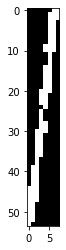

In [195]:
plt.imshow(test,cmap='gray')

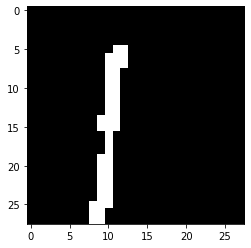

In [198]:
background = Image.fromarray(np.zeros((28,28)).astype(np.uint8))
image = Image.fromarray(test)
background.paste(image,(5,5))
plt.imshow(background,cmap='gray')

In [199]:
image_to_be_predicted = np.array(background)
image_to_be_predicted = np.reshape(image_to_be_predicted, (1,28,28,1))
np.argmax(model.predict(image_to_be_predicted))

1